In [1]:
import cv2 
import numpy as np

# 图像特征-harris角点检测
<br>

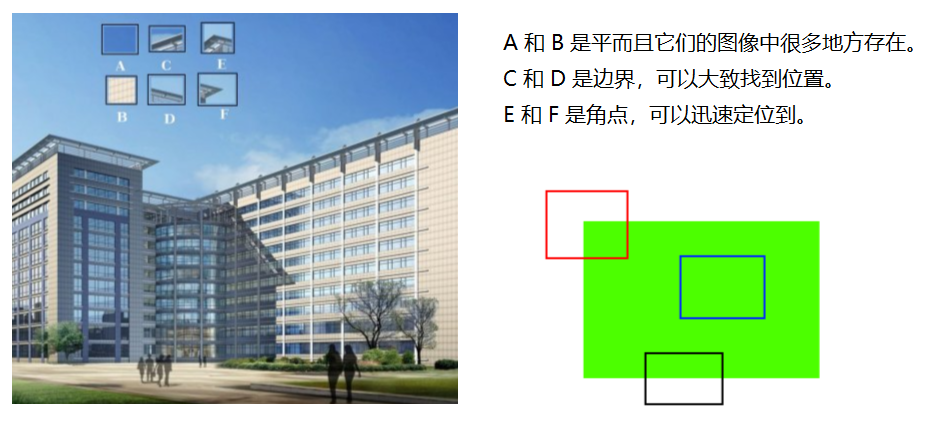

#### 基本原理

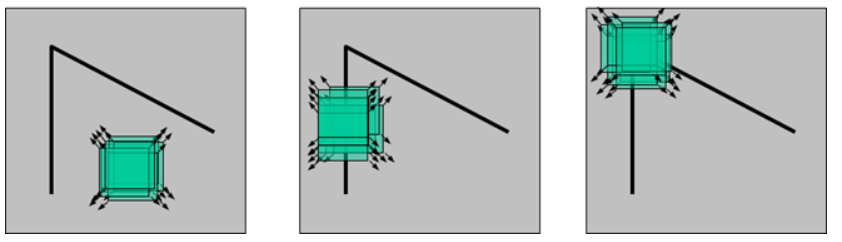

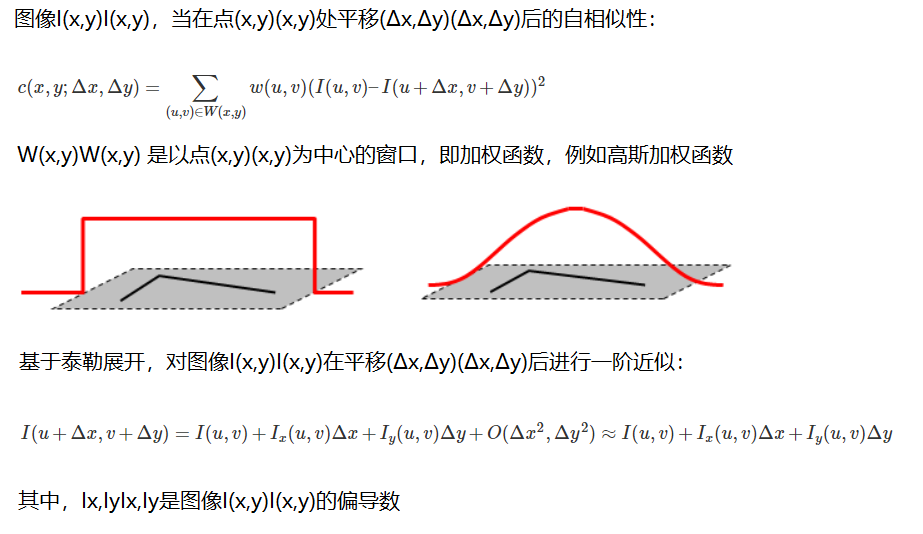

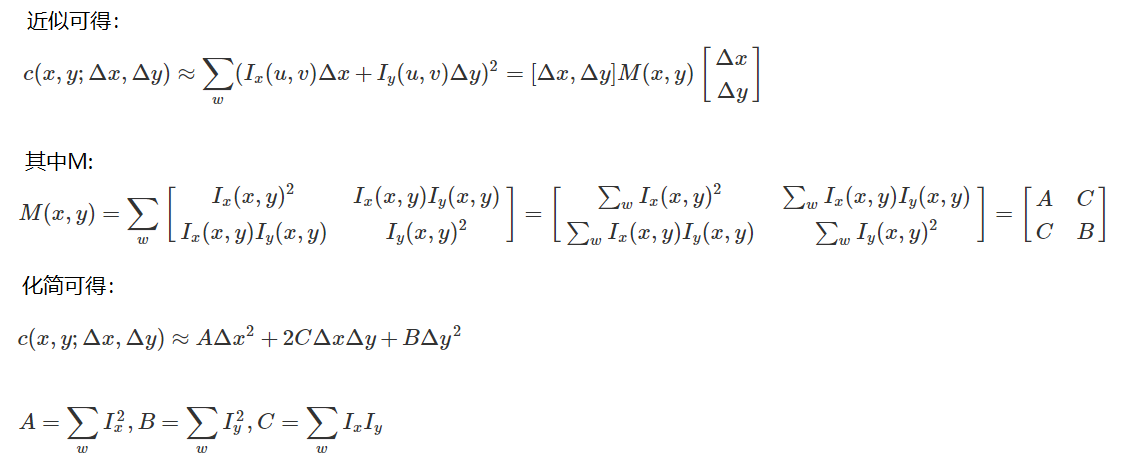

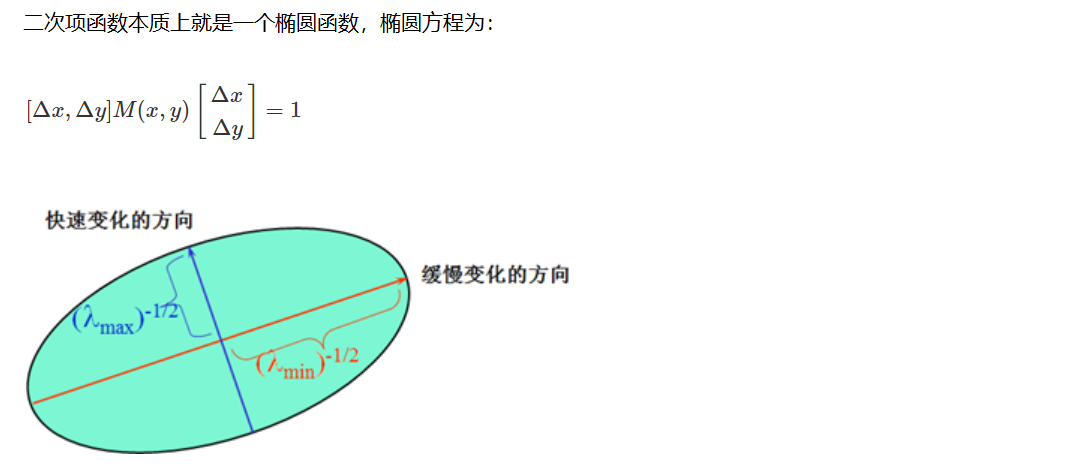

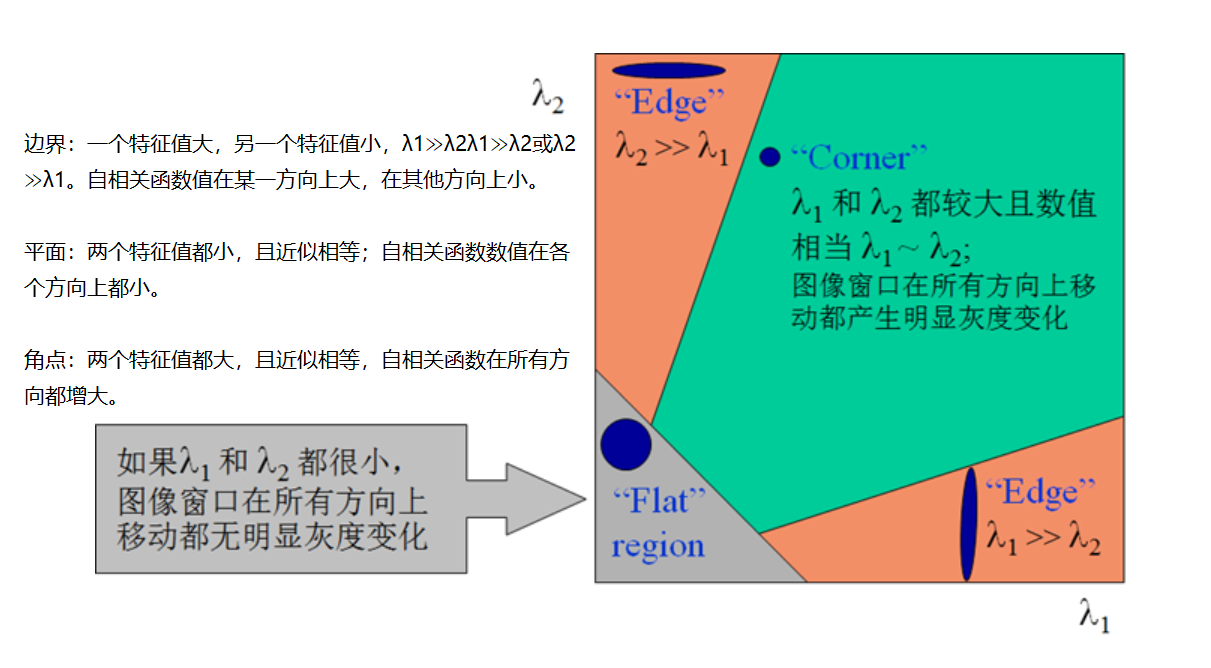

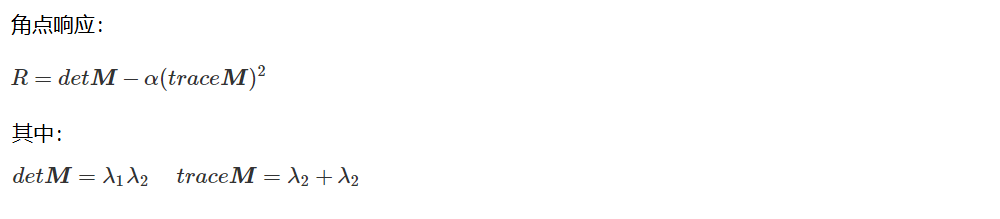

#### cv2.cornerHarris() 
- img： 数据类型为 ﬂoat32 的入图像
- blockSize： 角点检测中指定区域的大小
- ksize： Sobel求导中使用的窗口大小 
- k： 取值参数为 [0,04,0.06]

In [2]:
img = cv2.imread('../0-Datas/images/test_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('../0-Datas/images/chessboard.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

# Scale Invariant Feature Transform（SIFT）

## 图像尺度空间

在一定的范围内，无论物体是大还是小，人眼都可以分辨出来，然而计算机要有相同的能力却很难，所以要让机器能够对物体在不同尺度下有一个统一的认知，就需要考虑图像在不同的尺度下都存在的特点。

尺度空间的获取通常使用高斯模糊来实现

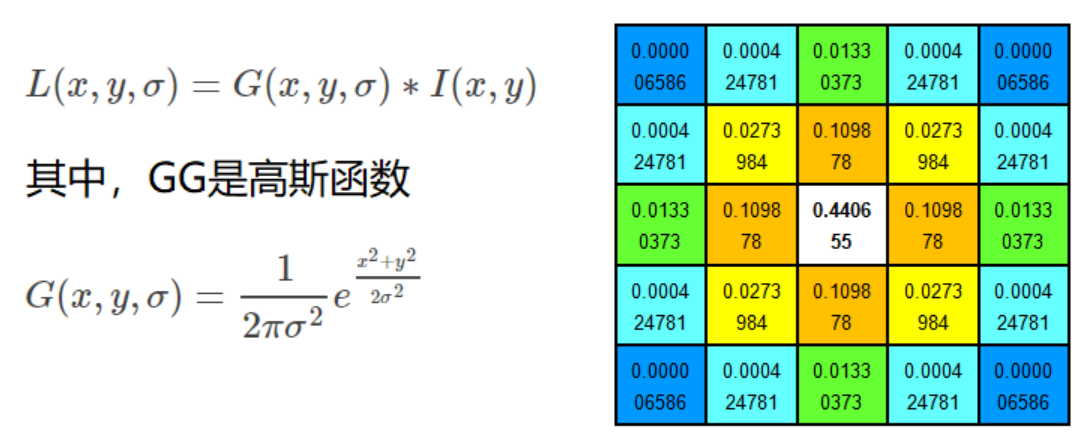

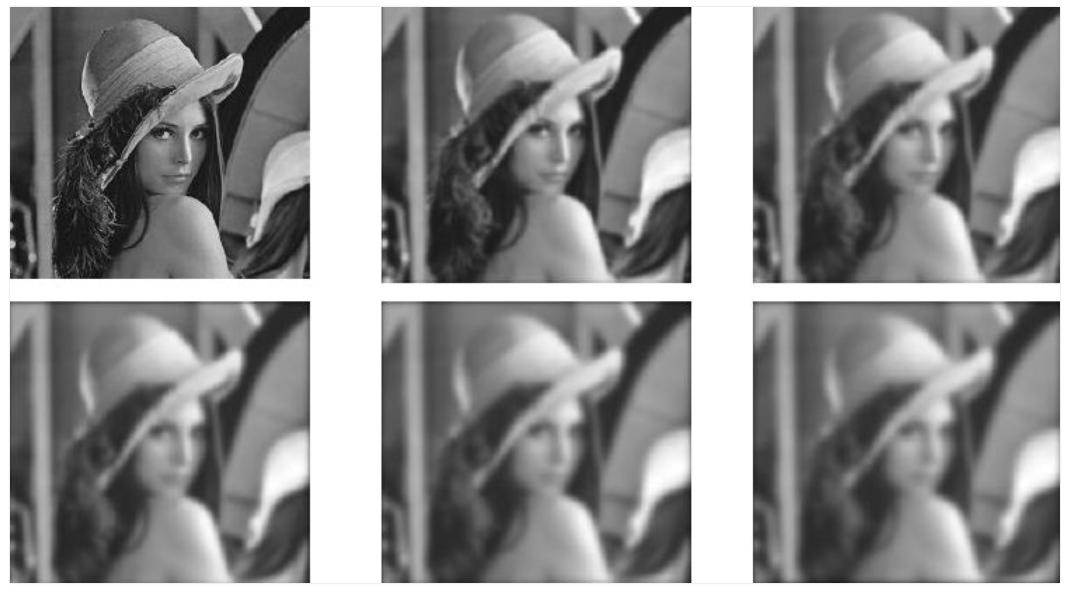

不同σ的高斯函数决定了对图像的平滑程度，越大的σ值对应的图像越模糊。

### 多分辨率金字塔

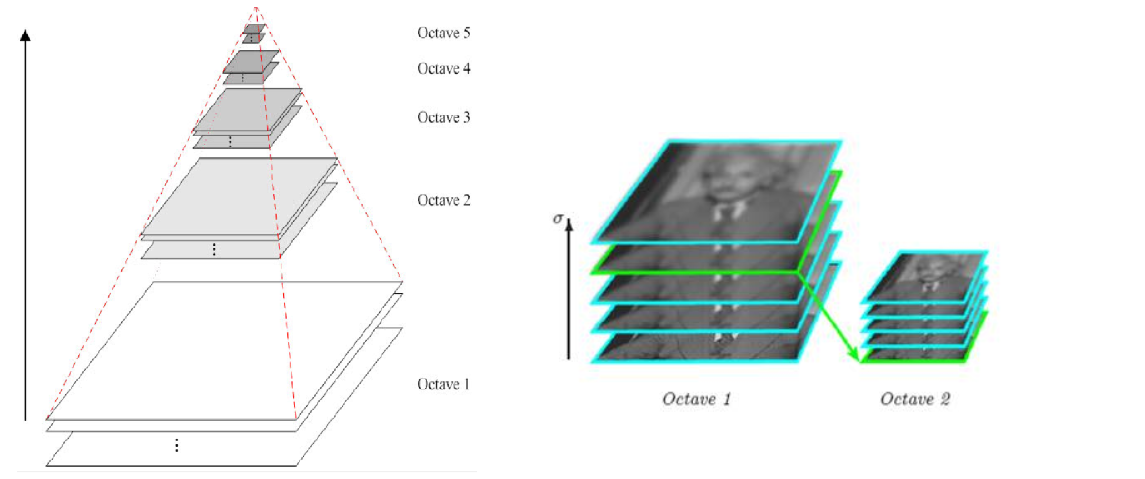

### 高斯差分金字塔（DOG）

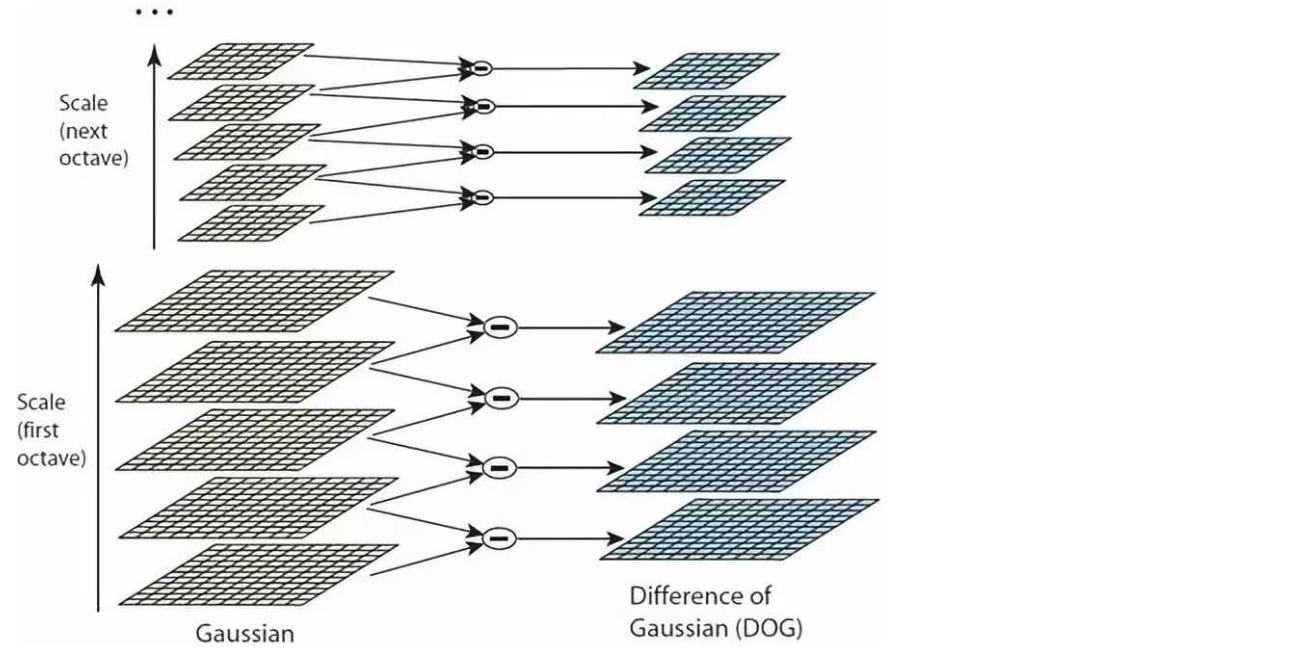

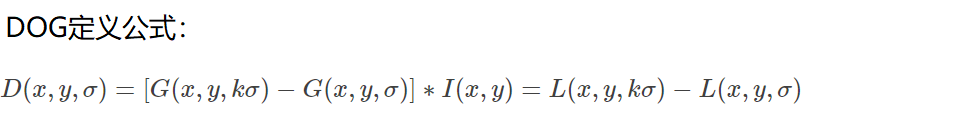

### DoG空间极值检测

为了寻找尺度空间的极值点，每个像素点要和其图像域（同一尺度空间）和尺度域（相邻的尺度空间）的所有相邻点进行比较，当其大于（或者小于）所有相邻点时，该点就是极值点。如下图所示，中间的检测点要和其所在图像的3×3邻域8个像素点，以及其相邻的上下两层的3×3领域18个像素点，共26个像素点进行比较。

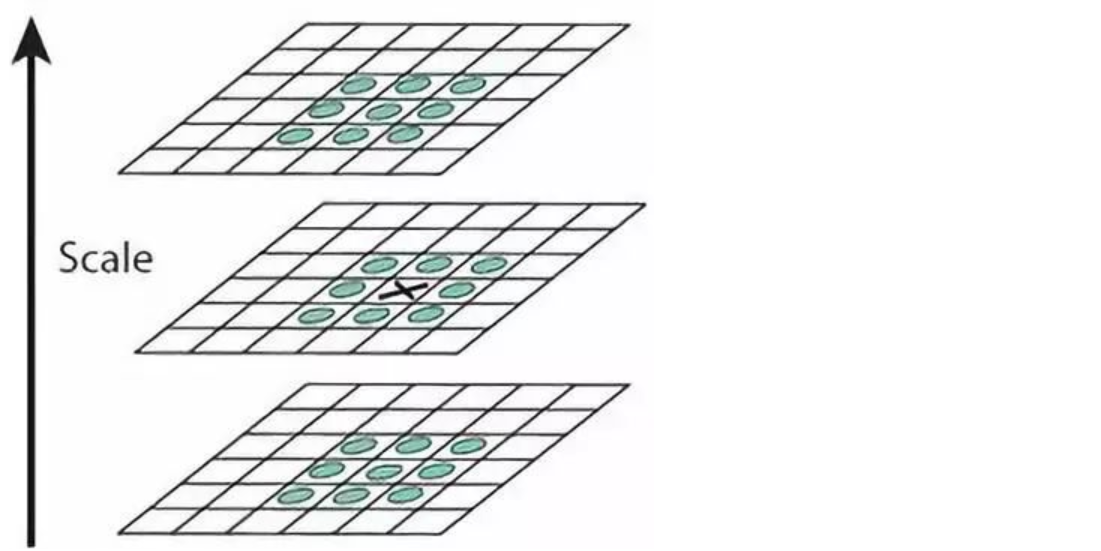

### 关键点的精确定位

这些候选关键点是DOG空间的局部极值点，而且这些极值点均为离散的点，精确定位极值点的一种方法是，对尺度空间DoG函数进行曲线拟合，计算其极值点，从而实现关键点的精确定位。

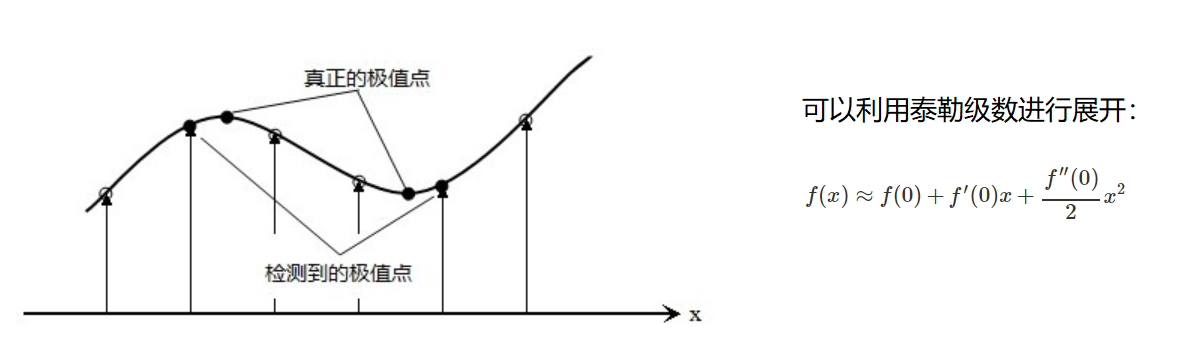

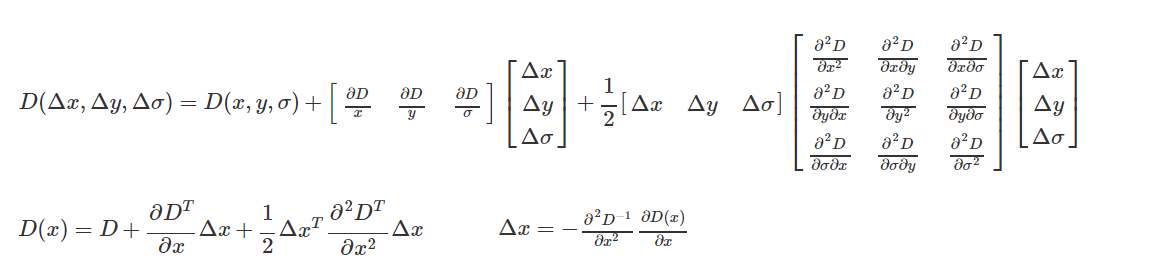

### 消除边界响应

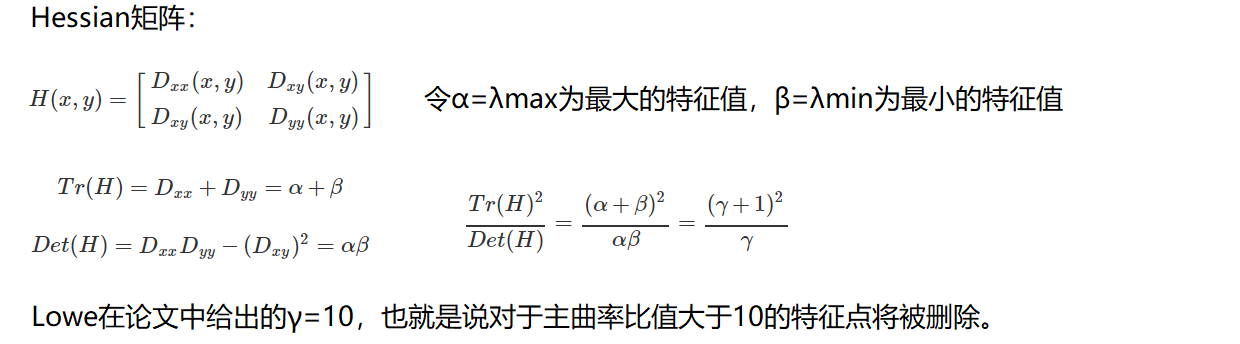

### 特征点的主方向

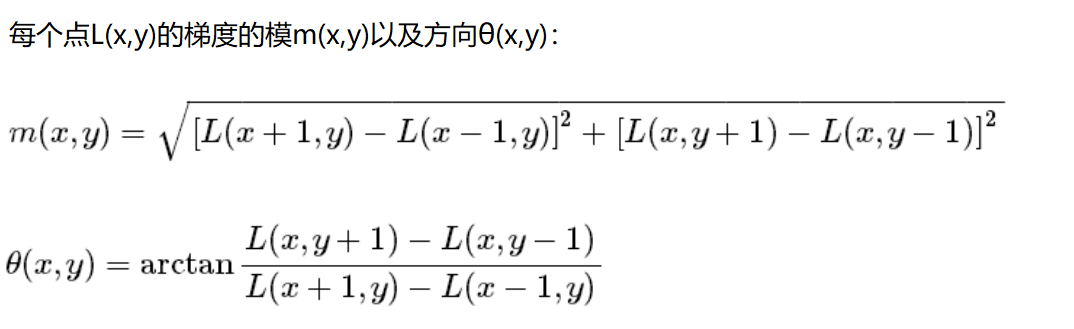

每个特征点可以得到三个信息(x,y,σ,θ)，即位置、尺度和方向。具有多个方向的关键点可以被复制成多份，然后将方向值分别赋给复制后的特征点，一个特征点就产生了多个坐标、尺度相等，但是方向不同的特征点。

### 生成特征描述

在完成关键点的梯度计算后，使用直方图统计邻域内像素的梯度和方向。

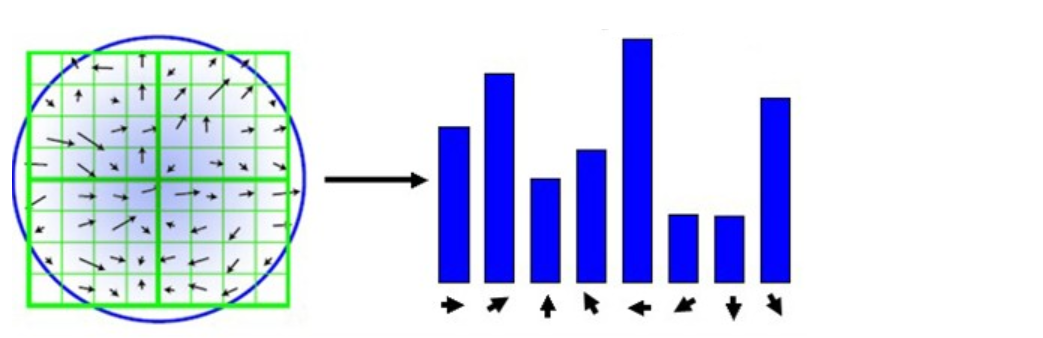

为了保证特征矢量的旋转不变性，要以特征点为中心，在附近邻域内将坐标轴旋转θ角度，即将坐标轴旋转为特征点的主方向。

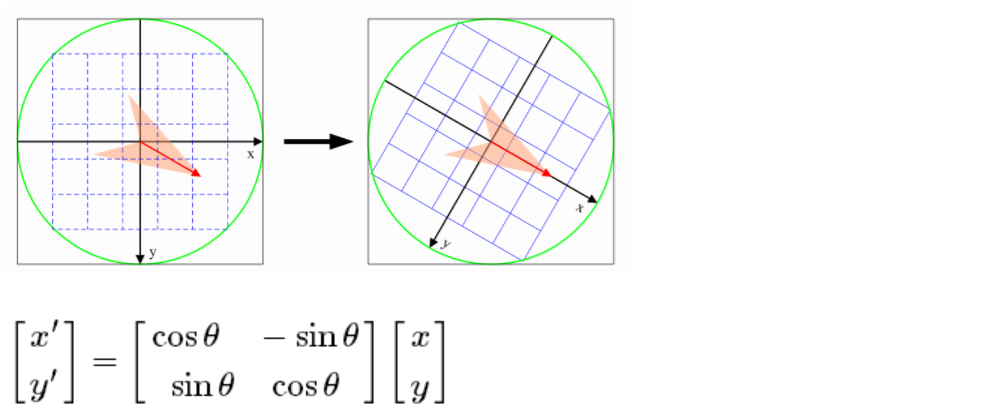

旋转之后的主方向为中心取8x8的窗口，求每个像素的梯度幅值和方向，箭头方向代表梯度方向，长度代表梯度幅值，然后利用高斯窗口对其进行加权运算，最后在每个4x4的小块上绘制8个方向的梯度直方图，计算每个梯度方向的累加值，即可形成一个种子点，即每个特征的由4个种子点组成，每个种子点有8个方向的向量信息。

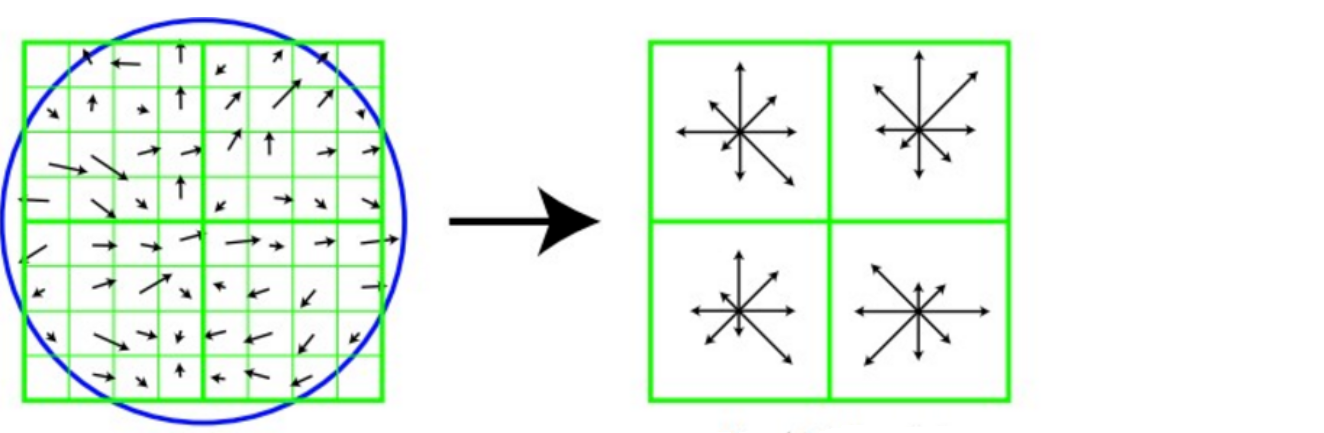

论文中建议对每个关键点使用4x4共16个种子点来描述，这样一个关键点就会产生128维的SIFT特征向量。 

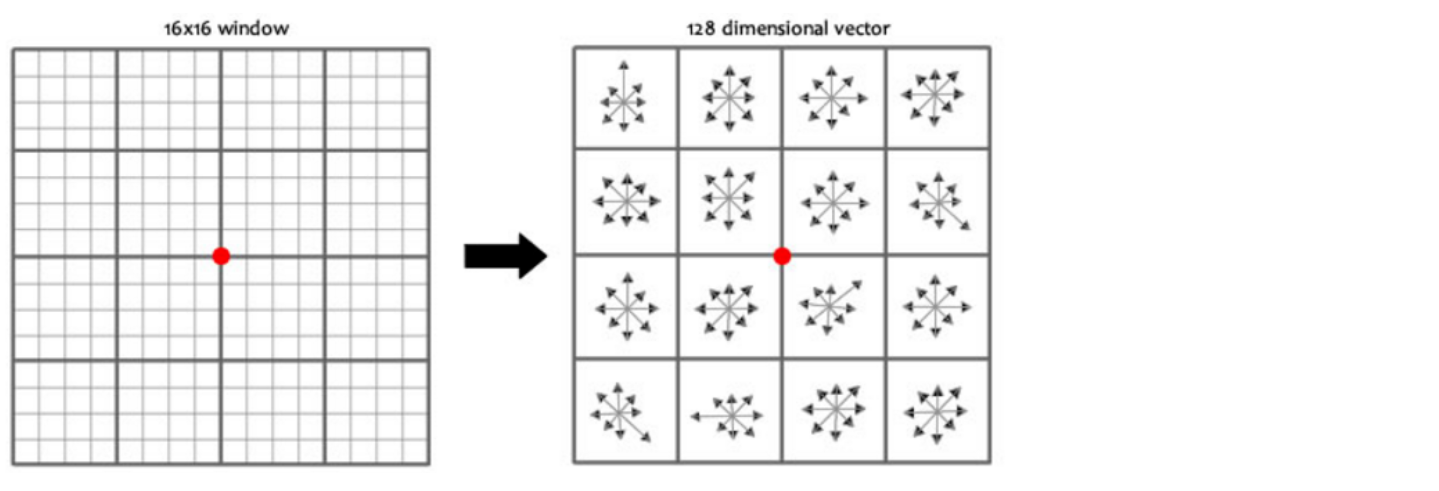

### opencv SIFT函数

In [4]:
img = cv2.imread('../0-Datas/images/test_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img = cv2.drawKeypoints(gray, kp, img)

cv2.imshow('drawKeypoints', img)
cv2.waitKey(0)
cv2.destroyAllWindows()